In [246]:
import pandas as pd
import numpy as np


In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
%matplotlib inline

In [249]:
#Input column names that is to be attached to the dataset

col_names = ["duration","protocol_type","service","flag","src_bytes",

    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",

    "logged_in","num_compromised","root_shell","su_attempted","num_root",

    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",

    "is_host_login","is_guest_login","count","srv_count","serror_rate",

    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",

    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",

    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",

    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",

    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

#Creating a dataframe df & df_test for the training and test dataset respectively and 
#reading in the training and test dataset.


df = pd.read_csv("nsl-kdd datasets/Network-Intrusion-Detection-master/KDDTrain+_2.csv", header=None, names = col_names)
df_test = pd.read_csv("nsl-kdd datasets/Network-Intrusion-Detection-master/KDDTest+_2.csv", header=None, names = col_names)


In [250]:
#Using df.shape to get the dimension of the training set and test set

print('The dimension of the training dataset:{}'.format(df.shape))
print('The dimension of the test dataset:{}'.format(df_test.shape))

The dimension of the training dataset:(125973, 42)
The dimension of the test dataset:(22544, 42)


In [251]:
#SAMPLE VIEW OF THE TRAINING DATASET

# this gives the first five rows by default
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [252]:
#SAMPLE VIEW OF THE TEST DATASET

# this gives the first five rows by default
df_test.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [253]:
#STATISTICAL SUMMARY OF TRAINING DATASET (statistical summary of numeric columns are given excluding categorical columns)

df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [254]:
#STATISTICAL SUMMARY OF TEST DATASET(statistical summary of numeric columns are given excluding categorical features columns)

df_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [255]:
#To reference the column names for training dataset:

df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [256]:
#To reference the column names for test dataset:

df_test.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [257]:
#TO VIEW LABEL DISTRIBUTION OF TRAINING AND TEST DATASET

#To view all the unique values in 'label' column of training and test dataset

print('Unique values in label column of training dataset:')
print(df['label'].unique())
print()
print('Unique values in label column of test dataset:')
print(df_test['label'].unique())

#To count number of times unique values appear in the 'label' column of training and test dataset
print()
print('Label distribution of Training datasetset:')      
print(df['label'].value_counts())
print()
print('Label distribution of Test dataset:{}')
print(df_test['label'].value_counts())


Unique values in label column of training dataset:
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']

Unique values in label column of test dataset:
['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'loadmodule' 'xterm'
 'worm' 'teardrop' 'rootkit' 'xlock' 'perl' 'land' 'xsnoop' 'sqlattack'
 'ftp_write' 'imap' 'udpstorm' 'phf']

Label distribution of Training datasetset:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient 

In [258]:
#Checking info method on our dataframe which indicates no of entries,no of columns, type of object in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [259]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
duration                       22544 non-null int64
protocol_type                  22544 non-null object
service                        22544 non-null object
flag                           22544 non-null object
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_root                       22544 non-null int64
num_file_creations             22544 non-null int64
num_

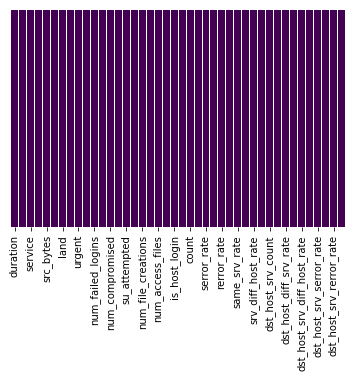

In [260]:
#PERFORMING EXPLORATORY DATA ANALYSIS
#FIRST CHECK FOR MISSING DATA USING SEABORN HEATMAP in which yellow markings as indicated by cmap='viridis' shows the 
#presence of missing data, no yellow markings mean no missing data.

#Training dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

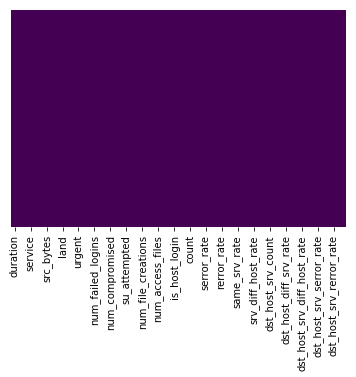

In [261]:
#Test dataset
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [262]:
#IDENTIFYING CATEGORICAL COLUMN DATA IN TRAINING DATASET AND EXPLORING THEIR CONTENTS

#Training dataset
print('Training dataset:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{}' has {} categories".format(col_name,unique_cat))

   

Training dataset:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories


In [263]:
#IDENTIFYING CATEGORICAL FEATURES AND EXPLORING THEIR CONTENTS

#Test dataset
print('Test dataset:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{}' has {} categories".format(col_name,unique_cat))
   

Test dataset:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


In [264]:
#CHECK IF CATEGORIES OF EACH FEATURE ARE EVENLY DISTRIBUTED IN TRAINING AND TEST DATASET
#It can be seen that Feature 'service' categories are not evenly distributed.
#There are 6 missing categories in the test set

trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_urh_i',
 'service_red_i',
 'service_harvest',
 'service_aol',
 'service_http_2784',
 'service_http_8001']

In [265]:
for col in difference:
    df_test[col] = 0
df_test.shape


(22544, 48)

In [266]:
#Since there are no missing data, we will deal with categorical features

#Training dataset
#Creating dummy variables with pandas
#This output a dataframe with a column for every single category

dum1=pd.get_dummies(df['protocol_type'],prefix='protocol_type_')


In [267]:
dum1.head()

,protocol_type__icmp,protocol_type__tcp,protocol_type__udp
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


In [268]:
dum2=pd.get_dummies(df['service'],prefix='service_')

In [269]:
dum2.head()

,service__IRC,service__X11,service__Z39_50,service__aol,service__auth,service__bgp,service__courier,service__csnet_ns,service__ctf,service__daytime,...,service__telnet,service__tftp_u,service__tim_i,service__time,service__urh_i,service__urp_i,service__uucp,service__uucp_path,service__vmnet,service__whois
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
dum3=pd.get_dummies(df['flag'],prefix='flag_')

In [271]:
dum3.head()

,flag__OTH,flag__REJ,flag__RSTO,flag__RSTOS0,flag__RSTR,flag__S0,flag__S1,flag__S2,flag__S3,flag__SF,flag__SH
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0


In [272]:
#Test dataset
#Creating dummy variables with pandas
#This output a dataframe with a column for every single category

dum11=pd.get_dummies(df_test['protocol_type'],prefix='protocol_type_')

In [273]:
dum11.head()

,protocol_type__icmp,protocol_type__tcp,protocol_type__udp
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [274]:
dum22=pd.get_dummies(df_test['service'],prefix='service_')

In [275]:
dum22.head()

,service__IRC,service__X11,service__Z39_50,service__auth,service__bgp,service__courier,service__csnet_ns,service__ctf,service__daytime,service__discard,...,service__systat,service__telnet,service__tftp_u,service__tim_i,service__time,service__urp_i,service__uucp,service__uucp_path,service__vmnet,service__whois
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [276]:
dum33=pd.get_dummies(df_test['flag'],prefix='flag_')

In [277]:
dum33.head()

,flag__OTH,flag__REJ,flag__RSTO,flag__RSTOS0,flag__RSTR,flag__S0,flag__S1,flag__S2,flag__S3,flag__SF,flag__SH
0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0


In [278]:
#Concatenating encoded dummies into the training and test dataset

#Training dataset
df=pd.concat([df,dum1,dum2,dum3], axis=1)

In [279]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,flag__REJ,flag__RSTO,flag__RSTOS0,flag__RSTR,flag__S0,flag__S1,flag__S2,flag__S3,flag__SF,flag__SH
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [280]:
#Test dataset
df_test=pd.concat([df_test,dum11,dum22,dum33], axis=1)

In [281]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,flag__REJ,flag__RSTO,flag__RSTOS0,flag__RSTR,flag__S0,flag__S1,flag__S2,flag__S3,flag__SF,flag__SH
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [282]:
#To drop initial categorical features that have been encoded

#Training dataset
df.drop(['protocol_type','service','flag'],axis=1,inplace=True)

In [283]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag__REJ,flag__RSTO,flag__RSTOS0,flag__RSTR,flag__S0,flag__S1,flag__S2,flag__S3,flag__SF,flag__SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [284]:
#Test dataset
df_test.drop(['protocol_type','service','flag'],axis=1,inplace=True)

In [285]:
df_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag__REJ,flag__RSTO,flag__RSTOS0,flag__RSTR,flag__S0,flag__S1,flag__S2,flag__S3,flag__SF,flag__SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [286]:
#To check the shape or dimension of training dataset
df.shape

(125973, 123)

In [287]:
#To check the shape or dimension of test dataset
df_test.shape

(22544, 123)

In [288]:
#SPLIT DATASETS INTO 4 DATASETS FOR EVERY ATTACK CATEGORY
#Rename every attack label: 0=normal, 1= DoS, 2=Probe, 3=R2L, 4=U2R
#Replace labels column with new labels column
#Make new datasets


# take label column for training dataset

labeldf=df['label']


# change the label column for training and test dataset

newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})


# put the new label column back to the training and test dataset

df['label'] = newlabeldf
print(df['label'].head())


0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


In [289]:
# take label column for test dataset

labeldf_test=df_test['label']

# change the label column for test dataset

newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})


# put the new label column back to the test dataset

df_test['label'] = newlabeldf_test
print(df_test['label'].head())

0    1
1    1
2    0
3    2
4    2
Name: label, dtype: int64


In [290]:
#Make new dataset

to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]

#train dataset
DoS_df=df[~df['label'].isin(to_drop_DoS)];
Probe_df=df[~df['label'].isin(to_drop_Probe)];
R2L_df=df[~df['label'].isin(to_drop_R2L)];
U2R_df=df[~df['label'].isin(to_drop_U2R)];



#test dataset
DoS_df_test=df_test[~df_test['label'].isin(to_drop_DoS)];
Probe_df_test=df_test[~df_test['label'].isin(to_drop_Probe)];
R2L_df_test=df_test[~df_test['label'].isin(to_drop_R2L)];
U2R_df_test=df_test[~df_test['label'].isin(to_drop_U2R)];

print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)

print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)


Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)
Test:
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


In [291]:
# Split dataframes into X & Y

# assign X as a dataframe of feautures and Y as a series of outcome variables

X_DoS = DoS_df.drop('label',1)
Y_DoS = DoS_df.label
X_Probe = Probe_df.drop('label',1)
Y_Probe = Probe_df.label
X_R2L = R2L_df.drop('label',1)
Y_R2L = R2L_df.label
X_U2R = U2R_df.drop('label',1)
Y_U2R = U2R_df.label

# test set

X_DoS_test = DoS_df_test.drop('label',1)
Y_DoS_test = DoS_df_test.label
X_Probe_test = Probe_df_test.drop('label',1)
Y_Probe_test = Probe_df_test.label
X_R2L_test = R2L_df_test.drop('label',1)
Y_R2L_test = R2L_df_test.label
X_U2R_test = U2R_df_test.drop('label',1)
Y_U2R_test = U2R_df_test.label


In [292]:
#USE StandardScaler() to scale the dataframes 


from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS) 
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe) 
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L) 
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R) 

# test data

scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test) 
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test) 
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test) 
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test) 


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all

In [293]:
#Check that the standard deviation is 1

print(X_DoS.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1.]


In [294]:
#DECISION TREE

#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of decision tree classifier.

clf = DecisionTreeClassifier(random_state=0)


In [295]:
#BUILD THE MODEL
#Classifier is trained for all features 
#the classifier itself is stored in clf variable

# all features

clf_DoS=DecisionTreeClassifier(random_state=0)
clf_Probe=DecisionTreeClassifier(random_state=0)
clf_R2L=DecisionTreeClassifier(random_state=0)
clf_U2R=DecisionTreeClassifier(random_state=0)
clf_DoS.fit(X_DoS, Y_DoS)
clf_Probe.fit(X_Probe, Y_Probe)
clf_R2L.fit(X_R2L, Y_R2L)
clf_U2R.fit(X_U2R, Y_U2R)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [296]:
#PREDICTION AND EVALUATION(VALIDATION) 
#Using all features for each category
#CONFUSION MATRICES


#DoS

Y_DoS_pred=clf_DoS.predict(X_DoS_test)

# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9499,212
1,2690,4770


In [297]:
#Probe


Y_Probe_pred=clf_Probe.predict(X_Probe_test)

# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,2
Actual attacks,,
0,2461,7250
2,260,2161


In [298]:
#R2L


Y_R2L_pred=clf_R2L.predict(X_R2L_test)

# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,3
Actual attacks,,
0,9707,4
3,2573,312


In [299]:
#U2R


Y_U2R_pred=clf_U2R.predict(X_U2R_test)

# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,4
Actual attacks,,
0,9703,8
4,60,7


In [448]:
#DoS Cross Validation: Accuracy,Precision,Recall,F-measure

from sklearn.model_selection import cross_val_score

from sklearn import metrics

accuracy_DoS_DT = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_DoS_DT.mean(), accuracy_DoS_DT.std() * 2))
precision_DoS_DT = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision_DoS_DT.mean(), precision_DoS_DT.std() * 2))
recall_DoS_DT = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall_DoS_DT.mean(), recall_DoS_DT.std() * 2))
f_measure_DoS_DT = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_DoS_DT.mean(), f_measure_DoS_DT.std() * 2))

Accuracy: 0.99785 (+/- 0.00181)
Precision: 0.99866 (+/- 0.00208)
Recall: 0.99692 (+/- 0.00495)
F-measure: 0.99745 (+/- 0.00260)


In [452]:
#Probe Cross Validation: Accuracy,Precision,Recall,F-measure

accuracy_Probe_DT = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_Probe_DT.mean(), accuracy_Probe_DT.std() * 2))
precision_Probe_DT = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_Probe_DT.mean(), precision_Probe_DT.std() * 2))
recall_Probe_DT = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_Probe_DT.mean(), recall_Probe_DT.std() * 2))
f_measure_Probe_DT = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_Probe_DT.mean(), f_measure_Probe_DT.std() * 2))


Accuracy: 0.99670 (+/- 0.00369)
Precision: 0.99639 (+/- 0.00479)
Recall: 0.99391 (+/- 0.00453)
F-measure: 0.99508 (+/- 0.00343)


In [453]:
#R2L Cross Validation: Accuracy,Precision,Recall,F-measure

accuracy_R2L_DT = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_R2L_DT.mean(), accuracy_R2L_DT.std() * 2))
precision_R2L_DT = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_R2L_DT.mean(), precision_R2L_DT.std() * 2))
recall_R2L_DT = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_R2L_DT.mean(), recall_R2L_DT.std() * 2))
f_measure_R2L_DT = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_R2L_DT.mean(), f_measure_R2L_DT.std() * 2))

Accuracy: 0.98039 (+/- 0.00651)
Precision: 0.97423 (+/- 0.00597)
Recall: 0.96895 (+/- 0.01038)
F-measure: 0.97093 (+/- 0.01096)


In [454]:
#U2R Cross Validation: Accuracy,Precision,Recall,F-measure

accuracy_U2R_DT = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_U2R_DT.mean(), accuracy_U2R_DT.std() * 2))
precision_U2R_DT = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_U2R_DT.mean(), precision_U2R_DT.std() * 2))
recall_U2R_DT = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_U2R_DT.mean(), recall_U2R_DT.std() * 2))
f_measure_U2R_DT = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_U2R_DT.mean(), f_measure_U2R_DT.std() * 2))


Accuracy: 0.99744 (+/- 0.00320)
Precision: 0.96770 (+/- 0.10131)
Recall: 0.85575 (+/- 0.15960)
F-measure: 0.88410 (+/- 0.09424)


In [305]:
#Stratified CV=> for all features

#DoS

from sklearn.model_selection import StratifiedKFold
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99651 (+/- 0.00317)


In [306]:
#Probe

accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99530 (+/- 0.00346)


In [307]:
#R2L

accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.97960 (+/- 0.01040)


In [308]:
#U2R

accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99714 (+/- 0.00314)


In [309]:
#CV 2, 5, 10, 30, 50 fold for all features

#DoS

accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99476 (+/- 0.00210)


In [310]:
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99563 (+/- 0.00218)


In [311]:
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99651 (+/- 0.00317)


In [312]:
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99691 (+/- 0.00500)


In [313]:
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99668 (+/- 0.00617)


In [314]:
#Probe

accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99497 (+/- 0.00049)


In [315]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99514 (+/- 0.00319)


In [316]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99530 (+/- 0.00346)


In [317]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99530 (+/- 0.00704)


In [318]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99538 (+/- 0.00913)


In [319]:
#R2L

accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.97999 (+/- 0.00031)


In [320]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.98039 (+/- 0.00942)


In [321]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.97960 (+/- 0.01040)


In [322]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.97912 (+/- 0.01373)


In [323]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.97912 (+/- 0.01619)


In [324]:
#U2R

accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99540 (+/- 0.00143)


In [325]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99724 (+/- 0.00211)


In [326]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99714 (+/- 0.00314)


In [327]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99744 (+/- 0.00614)


In [328]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99806 (+/- 0.00537)


In [329]:
#k-NEAREST NEIGHBOR(KNN)

from sklearn.neighbors import KNeighborsClassifier

In [330]:
#BUILD THE MODEL
#Classifier is trained for all features 
#the classifier itself is stored in clf variable

# all features

clf_KNN_DoS=KNeighborsClassifier()
clf_KNN_Probe=KNeighborsClassifier()
clf_KNN_R2L=KNeighborsClassifier()
clf_KNN_U2R=KNeighborsClassifier()


clf_KNN_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_KNN_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_KNN_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_KNN_U2R.fit(X_U2R, Y_U2R.astype(int))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [331]:
Y_DoS_pred=clf_KNN_DoS.predict(X_DoS_test)

# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9581,130
1,2199,5261


In [332]:
#Probe


Y_Probe_pred=clf_KNN_Probe.predict(X_Probe_test)

# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,2
Actual attacks,,
0,9528,183
2,1122,1299


In [333]:
#R2L


Y_R2L_pred=clf_KNN_R2L.predict(X_R2L_test)

# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,3
Actual attacks,,
0,9686,25
3,2883,2


In [334]:
#U2R


Y_U2R_pred=clf_KNN_U2R.predict(X_U2R_test)

# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,4
Actual attacks,,
0,9711,0
4,65,2


In [455]:
#DoS Cross Validation: Accuracy,Precision,Recall,F-measure

from sklearn.model_selection import cross_val_score

from sklearn import metrics

accuracy_DoS_KNN = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_DoS_KNN.mean(), accuracy_DoS_KNN.std() * 2))
precision_DoS_KNN = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision_DoS_KNN.mean(), precision_DoS_KNN.std() * 2))
recall_DoS_KNN = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall_DoS_KNN.mean(), recall_DoS_KNN.std() * 2))
f_measure_DoS_KNN = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_DoS_KNN.mean(), f_measure_DoS_KNN.std() * 2))

Accuracy: 0.99715 (+/- 0.00278)
Precision: 0.99678 (+/- 0.00383)
Recall: 0.99665 (+/- 0.00344)
F-measure: 0.99672 (+/- 0.00320)


In [456]:
#Probe Cross Validation: Accuracy,Precision,Recall,F-measure

accuracy_Probe_KNN = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_Probe_KNN.mean(), accuracy_Probe_KNN.std() * 2))
precision_Probe_KNN = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_Probe_KNN.mean(), precision_Probe_KNN.std() * 2))
recall_Probe_KNN = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_Probe_KNN.mean(), recall_Probe_KNN.std() * 2))
f_measure_Probe_KNN = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_Probe_KNN.mean(), f_measure_Probe_KNN.std() * 2))


Accuracy: 0.99077 (+/- 0.00403)
Precision: 0.98606 (+/- 0.00674)
Recall: 0.98508 (+/- 0.01137)
F-measure: 0.98553 (+/- 0.00645)


In [457]:
#R2L Cross Validation: Accuracy,Precision,Recall,F-measure

accuracy_R2L_KNN = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_R2L_KNN.mean(), accuracy_R2L_KNN.std() * 2))
precision_R2L_KNN = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_R2L_KNN.mean(), precision_R2L_KNN.std() * 2))
recall_R2L_KNN = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_R2L_KNN.mean(), recall_R2L_KNN.std() * 2))
f_measure_R2L_KNN = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_R2L_KNN.mean(), f_measure_R2L_KNN.std() * 2))

Accuracy: 0.96737 (+/- 0.00729)
Precision: 0.95311 (+/- 0.01273)
Recall: 0.95484 (+/- 0.01327)
F-measure: 0.95389 (+/- 0.01030)


In [339]:
#U2R Cross Validation: Accuracy,Precision,Recall,F-measure

accuracy_U2R_KNN = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_U2R_KNN.mean(), accuracy_U2R_KNN.std() * 2))
precision_U2R_KNN = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_U2R_KNN.mean(), precision_U2R_KNN.std() * 2))
recall_U2R_KNN = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_U2R_KNN.mean(), recall_U2R_KNN.std() * 2))
f_measure_U2R_KNN = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_U2R_KNN.mean(), f_measure_U2R_KNN.std() * 2))


Accuracy: 0.99703 (+/- 0.00281)
Precision: 0.93282 (+/- 0.14488)
Recall: 0.84835 (+/- 0.17662)
F-measure: 0.87754 (+/- 0.11386)


In [340]:
#Stratified CV=> for all features

#DoS
from sklearn.model_selection import StratifiedKFold
accuracy = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99715 (+/- 0.00278)


In [341]:
#Probe

accuracy = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99077 (+/- 0.00403)


In [342]:
#R2L

accuracy = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.96737 (+/- 0.00729)


In [343]:
#U2R

accuracy = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99703 (+/- 0.00281)


In [344]:
#CV 2, 5, 10, 30, 50 fold
#DoS

accuracy = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99394 (+/- 0.00140)


In [345]:
accuracy = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99633 (+/- 0.00141)


In [346]:
accuracy = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99715 (+/- 0.00278)


In [347]:
accuracy = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99715 (+/- 0.00367)


In [348]:
accuracy = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99715 (+/- 0.00540)


In [349]:
#Probe

accuracy = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.98623 (+/- 0.00215)


In [350]:
accuracy = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.98978 (+/- 0.00241)


In [351]:
accuracy = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99077 (+/- 0.00403)


In [352]:
accuracy = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99143 (+/- 0.00774)


In [353]:
accuracy = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99135 (+/- 0.01045)


In [354]:
#R2L

accuracy = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.96864 (+/- 0.00144)


In [355]:
accuracy = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.96793 (+/- 0.00580)


In [356]:
accuracy = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.96737 (+/- 0.00729)


In [357]:
accuracy = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.96785 (+/- 0.01584)


In [358]:
accuracy = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.96832 (+/- 0.01815)


In [359]:
#U2R

accuracy = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99652 (+/- 0.00041)


In [360]:
accuracy = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99703 (+/- 0.00119)


In [361]:
accuracy = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99703 (+/- 0.00281)


In [362]:
accuracy = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99703 (+/- 0.00643)


In [363]:
accuracy = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99714 (+/- 0.00651)


In [364]:
# SUPPORT VECTOR MACHINE(SVM)
from sklearn.svm import SVC

clf = SVC(kernel='linear')

In [365]:
#BUILD THE MODEL
#Classifier is trained for all features 
#the classifier itself is stored in clf variable

# all features

clf_SVM_DoS=SVC(kernel='linear',C=1.0,random_state=0)
clf_SVM_Probe=SVC(kernel='linear',C=1.0,random_state=0)
clf_SVM_R2L=SVC(kernel='linear',C=1.0,random_state=0)
clf_SVM_U2R=SVC(kernel='linear',C=1.0,random_state=0)


clf_SVM_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_SVM_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_SVM_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_SVM_U2R.fit(X_U2R, Y_U2R.astype(int))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [366]:
#DoS

Y_DoS_pred=clf_SVM_DoS.predict(X_DoS_test)

# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,8840,871
1,1745,5715


In [367]:
#Probe


Y_Probe_pred=clf_SVM_Probe.predict(X_Probe_test)

# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,2
Actual attacks,,
0,9637,74
2,1238,1183


In [368]:
#R2L


Y_R2L_pred=clf_SVM_R2L.predict(X_R2L_test)

# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,3
Actual attacks,,
0,9651,60
3,2882,3


In [369]:
#U2R


Y_U2R_pred=clf_SVM_U2R.predict(X_U2R_test)

# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,4
Actual attacks,,
0,9646,65
4,65,2


In [370]:
#DoS Cross Validation: Accuracy,Precision,Recall,F-measure

from sklearn.model_selection import cross_val_score

from sklearn import metrics

accuracy_DoS_SVM = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_DoS_SVM.mean(), accuracy_DoS_SVM.std() * 2))
precision_DoS_SVM = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision_DoS_SVM.mean(), precision_DoS_SVM.std() * 2))
recall_DoS_SVM = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall_DoS_SVM.mean(), recall_DoS_SVM.std() * 2))
f_measure_DoS_SVM = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_DoS_SVM.mean(), f_measure_DoS_SVM.std() * 2))

Accuracy: 0.99371 (+/- 0.00375)
Precision: 0.99107 (+/- 0.00785)
Recall: 0.99450 (+/- 0.00388)
F-measure: 0.99278 (+/- 0.00428)


In [433]:
#Probe Cross Validation: Accuracy,Precision,Recall,F-measure

accuracy_Probe_SVM = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_Probe_SVM.mean(), accuracy_Probe_SVM.std() * 2))
precision_Probe_SVM = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_Probe_SVM.mean(), precision_Probe_SVM.std() * 2))
recall_Probe_SVM = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_Probe_SVM.mean(), recall_Probe_SVM.std() * 2))
f_measure_Probe_SVM = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_Probe_SVM.mean(), f_measure_Probe_SVM.std() * 2))


Accuracy: 0.98450 (+/- 0.00525)
Precision: 0.96907 (+/- 0.01029)
Recall: 0.98365 (+/- 0.00686)
F-measure: 0.97613 (+/- 0.00799)


In [434]:
#R2L Cross Validation: Accuracy,Precision,Recall,F-measure

accuracy_R2L_SVM = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_R2L_SVM.mean(), accuracy_R2L_SVM.std() * 2))
precision_R2L_SVM = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_R2L_SVM.mean(), precision_R2L_SVM.std() * 2))
recall_R2L_SVM = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_R2L_SVM.mean(), recall_R2L_SVM.std() * 2))
f_measure_R2L_SVM = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_R2L_SVM.mean(), f_measure_R2L_SVM.std() * 2))

Accuracy: 0.96793 (+/- 0.00738)
Precision: 0.94854 (+/- 0.00992)
Recall: 0.96264 (+/- 0.01386)
F-measure: 0.95529 (+/- 0.01046)


In [435]:
#U2R Cross Validation: Accuracy,Precision,Recall,F-measure

accuracy_U2R_SVM = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_U2R_SVM.mean(), accuracy_U2R_SVM.std() * 2))
precision_U2R_SVM = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_U2R_SVM.mean(), precision_U2R_SVM.std() * 2))
recall_U2R_SVM = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_U2R_SVM.mean(), recall_U2R_SVM.std() * 2))
f_measure_U2R_SVM = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_U2R_SVM.mean(), f_measure_U2R_SVM.std() * 2))


Accuracy: 0.99652 (+/- 0.00245)
Precision: 0.91988 (+/- 0.15114)
Recall: 0.83981 (+/- 0.17847)
F-measure: 0.85918 (+/- 0.10713)


In [374]:
#Stratified CV=> for all features

#DoS

from sklearn.model_selection import StratifiedKFold
accuracy = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99371 (+/- 0.00375)


In [375]:
#Probe

accuracy = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.98450 (+/- 0.00525)


In [376]:
#R2L

accuracy = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.96793 (+/- 0.00738)


In [377]:
#U2R

accuracy = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99652 (+/- 0.00245)


In [378]:
#CV 2, 5, 10, 30, 50 fold for all features
#DoS

accuracy = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99289 (+/- 0.00117)


In [379]:
accuracy = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99400 (+/- 0.00217)


In [380]:
accuracy = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99371 (+/- 0.00375)


In [381]:
accuracy = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99394 (+/- 0.00675)


In [382]:
accuracy = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99406 (+/- 0.00824)


In [383]:
#Probe

accuracy = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.98393 (+/- 0.00149)


In [384]:
accuracy = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.98516 (+/- 0.00290)


In [385]:
accuracy = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.98450 (+/- 0.00525)


In [386]:
accuracy = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.98467 (+/- 0.01139)


In [387]:
accuracy = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.98491 (+/- 0.01571)


In [388]:
#R2L

accuracy = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.96697 (+/- 0.00189)


In [389]:
accuracy = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.96737 (+/- 0.00491)


In [390]:
accuracy = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.96793 (+/- 0.00738)


In [391]:
accuracy = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.96824 (+/- 0.01661)


In [392]:
accuracy = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.96872 (+/- 0.02267)


In [393]:
#U2R

accuracy = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99673 (+/- 0.00000)


In [394]:
accuracy = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99652 (+/- 0.00176)


In [395]:
accuracy = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99652 (+/- 0.00245)


In [396]:
accuracy = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99652 (+/- 0.00440)


In [397]:
accuracy = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99653 (+/- 0.00593)


In [398]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10,n_jobs=2)

In [399]:
#BUILD THE MODEL
#Classifier is trained for all features and for reduced features,for later comparison
#the classifier itself is stored in clf variable

# all features

clf_DoS=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_Probe=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_R2L=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_U2R=RandomForestClassifier(n_estimators=10,n_jobs=2)


clf_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_U2R.fit(X_U2R, Y_U2R.astype(int))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [400]:
#DoS

Y_DoS_pred=clf_DoS.predict(X_DoS_test)

# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9684,27
1,2712,4748


In [401]:
#Probe


Y_Probe_pred=clf_Probe.predict(X_Probe_test)

# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,2
Actual attacks,,
0,9474,237
2,1179,1242


In [402]:
#R2L


Y_R2L_pred=clf_R2L.predict(X_R2L_test)

# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,3
Actual attacks,,
0,9701,10
3,2885,0


In [403]:
#U2R


Y_U2R_pred=clf_U2R.predict(X_U2R_test)

# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0
Actual attacks,
0,9711
4,67


In [404]:
#DoS Cross Validation: Accuracy,Precision,Recall,F-measure

from sklearn.model_selection import cross_val_score

from sklearn import metrics

accuracy_DoS_RF = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_DoS_RF.mean(), accuracy_DoS_RF.std() * 2))
precision_DoS_RF = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision_DoS_RF.mean(), precision_DoS_RF.std() * 2))
recall_DoS_RF = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall_DoS_RF.mean(), recall_DoS_RF.std() * 2))
f_measure_DoS_RF = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_DoS_RF.mean(), f_measure_DoS_RF.std() * 2))

Accuracy: 0.99814 (+/- 0.00238)
Precision: 0.99866 (+/- 0.00268)
Recall: 0.99611 (+/- 0.00349)
F-measure: 0.99785 (+/- 0.00246)


In [405]:
#Probe Cross Validation: Accuracy,Precision,Recall,F-measure

accuracy_Probe_RF = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_Probe_RF.mean(), accuracy_Probe_RF.std() * 2))
precision_Probe_RF = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_Probe_RF.mean(), precision_Probe_RF.std() * 2))
recall_Probe_RF = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_Probe_RF.mean(), recall_Probe_RF.std() * 2))
f_measure_Probe_RF = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_Probe_RF.mean(), f_measure_Probe_RF.std() * 2))


Accuracy: 0.99687 (+/- 0.00284)
Precision: 0.99597 (+/- 0.00611)
Recall: 0.99308 (+/- 0.00403)
F-measure: 0.99379 (+/- 0.00475)


In [406]:
#R2L Cross Validation: Accuracy,Precision,Recall,F-measure

accuracy_R2L_RF = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_R2L_RF.mean(), accuracy_R2L_RF.std() * 2))
precision_R2L_RF = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_R2L_RF.mean(), precision_R2L_RF.std() * 2))
recall_R2L_RF = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_R2L_RF.mean(), recall_R2L_RF.std() * 2))
f_measure_R2L_RF = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_R2L_RF.mean(), f_measure_R2L_RF.std() * 2))

Accuracy: 0.98047 (+/- 0.00726)
Precision: 0.97421 (+/- 0.01008)
Recall: 0.97180 (+/- 0.00928)
F-measure: 0.97222 (+/- 0.01014)


In [407]:
#U2R Cross Validation: Accuracy,Precision,Recall,F-measure

accuracy_U2R_RF = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy_U2R_RF.mean(), accuracy_U2R_RF.std() * 2))
precision_U2R_RF = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_U2R_RF.mean(), precision_U2R_RF.std() * 2))
recall_U2R_RF = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_U2R_RF.mean(), recall_U2R_RF.std() * 2))
f_measure_U2R_RF = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure_U2R_RF.mean(), f_measure_U2R_RF.std() * 2))


Accuracy: 0.99765 (+/- 0.00243)
Precision: 0.96479 (+/- 0.08604)
Recall: 0.84974 (+/- 0.16248)
F-measure: 0.88923 (+/- 0.07962)


In [408]:
#Stratified CV=>for all features

#DoS

from sklearn.model_selection import StratifiedKFold
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99796 (+/- 0.00167)


In [409]:
#Probe

accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99621 (+/- 0.00315)


In [410]:
#R2L

accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.97999 (+/- 0.00677)


In [411]:
#U2R

accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99744 (+/- 0.00229)


In [412]:
#CV 2, 5, 10, 30, 50 fold for all features
#DoS

accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99779 (+/- 0.00047)


In [413]:
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99785 (+/- 0.00102)


In [414]:
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99767 (+/- 0.00195)


In [415]:
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99779 (+/- 0.00349)


In [416]:
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99808 (+/- 0.00489)


In [417]:
#Probe

accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99596 (+/- 0.00214)


In [418]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99679 (+/- 0.00241)


In [419]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99646 (+/- 0.00391)


In [420]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99695 (+/- 0.00473)


In [421]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99687 (+/- 0.00691)


In [422]:
#R2L

accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.98150 (+/- 0.00079)


In [423]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.98126 (+/- 0.00523)


In [424]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.98071 (+/- 0.00700)


In [425]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.98031 (+/- 0.01155)


In [426]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.97983 (+/- 0.01422)


In [427]:
#U2R

accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99683 (+/- 0.00102)


In [428]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99724 (+/- 0.00247)


In [429]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99765 (+/- 0.00290)


In [430]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99785 (+/- 0.00452)


In [431]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99755 (+/- 0.00621)
